# L2感知器算法作业

一、分别编写PLA算法和Pocket算法。

In [ ]:
import numpy as np

data_PLA = [
  [1, 3, 3, 1],
  [1, 4, 3, 1],
  [1, 1, 1, -1],
]

data_Pocket = [
  [1, 0.2, 0.7, 1],
  [1, 0.3, 0.3, 1],
  [1, 0.4, 0.5, 1],
  [1, 0.6, 0.5, 1],
  [1, 0.1, 0.4, 1],
  [1, 0.4, 0.6, -1],
  [1, 0.6, 0.2, -1],
  [1, 0.7, 0.4, -1],
  [1, 0.8, 0.6, -1],
  [1, 0.7, 0.5, -1],
  ]

def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def PLA(max_time=10000):
  data = np.array(data_PLA)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3);
  count = 0
  while count < max_time:
    count += 1
    error = 0
    for i in range(0,len(data)):
      now_Y = sign(np.dot(w,X[i]))
      if correct_Y[i] == now_Y:
        continue
      error += 1
      w += X[i] * correct_Y[i]
    if error == 0:
      break
      print("/nPocket")
  print("W equal to:",w)
  print("under this w error equal to:",error)
  print("iteration:",count)

def Pocket(max_time=10000):
  data = np.array(data_Pocket)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3)
  count = 0
  
  min_w = w
  min_error = len(X)

  while count < max_time:
    count += 1
    error = 0
    while count < max_time:
      count += 1
      error = 0
      flag = 0
      error_list = []
      for i in range(0,len(data)):
        now_Y = sign(np.dot(w,X[i]))
        if correct_Y[i] == now_Y:
          continue
        else:
          error_list.append([X[i],correct_Y[i]])
        error += 1

      if error == 0:
        min_error = 0
        break
      else:
        if error < min_error:
          min_error = error
          min_w = w

      error_sample = random.choice(error_list)
      w += error_sample[0] * error_sample[1]

  print("\nPocket")
  print("Min_w equal to:",min_w)
  print("under this w error equal to:",min_error)
  print("iteration:",count)

PLA()
Pocket()

W equal to: [-3.  1.  1.]
under this w error equal to: 0
iteration: 6

Pocket
Min_w equal to: [ 3. -5.  1.]
under this w error equal to: 1
iteration: 10000


二、


PLA
W equal to: [-1.         -5.12868649 -6.78720378]


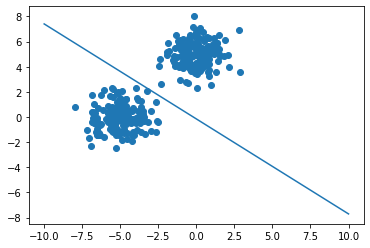

traing accuracy: 1.0
iteration: 4
PLA time is  0.004555940628051758

Pocket
Min_w equal to: [-1.         -5.02037227 -7.06631321]


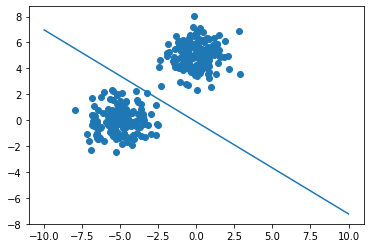

traing accuracy: 1.0
iteration: 8
Pocket time is  0.011993169784545898

PLA test accuracy: 1.0

Pocket test accuracy: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

X1 = np.random.multivariate_normal((-5,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,5), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

data_PLA_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\ 
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)])) #合并数据

data_Pocket_train = data_PLA_train

data_PLA_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

data_Pocket_test = data_PLA_test

def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def PLA(max_time=10000):
  start = time.time()
  data = np.array(data_PLA_train)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3);
  count = 0
  while count < max_time:     ##算法循环开始
    count += 1
    error = 0
    for i in range(0,len(data)):
      now_Y = sign(np.dot(w,X[i]))
      if correct_Y[i] == now_Y:
        continue
      error += 1
      w += X[i] * correct_Y[i]
    if error == 0:
      min_error = 0
      break
  print("\nPLA")
  print("W equal to:",w)
  end = time.time()
  
  plot_x = np.linspace(-10,10,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  print("traing accuracy:",(len(X)-error)/len(X))
  print("iteration:",count)
  print('PLA time is ',end - start)
  return w

def Pocket(max_time=10000):
  start = time.time()
  data = np.array(data_Pocket_train)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3)
  count = 0
  
  min_w = w
  min_error = len(X)

  while count < max_time:#算法循环开始
    count += 1
    error = 0
    flag = 0
    error_list = []
    for i in range(0,len(data)):  
      now_Y = sign(np.dot(w,X[i]))
      if correct_Y[i] == now_Y:
        continue
      else:
        error_list.append([X[i],correct_Y[i]])  #记录error数据
      error += 1

    if error == 0:
      min_error = 0
      break
    else:
      if error < min_error:
        min_error = error
        min_w = w

    error_sample = random.choice(error_list)  #随机取一个error对w更新
    w += error_sample[0] * error_sample[1]
    
  print("\nPocket")
  print("Min_w equal to:",min_w)
  end = time.time()

  plot_x = np.linspace(-10,10,1000)
  plot_y = -(min_w[1]/min_w[2])*plot_x - min_w[0]/min_w[2]
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  print("traing accuracy:",(len(X)-error)/len(X))
  print("iteration:",count)
  print('Pocket time is ',end - start)
  return min_w

def PLA_Test(w):
  data = np.array(data_PLA_test)
  X = data[:,:-1]
  correct_Y = data[:,-1]
  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("\nPLA test accuracy:",(len(X)-error)/len(X))

def Pocket_Test(w):
  data = np.array(data_Pocket_test)
  X = data[:,:-1]
  correct_Y = data[:,-1]
  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("\nPocket test accuracy:",(len(X)-error)/len(X))


PLA_w = PLA()
Pocket_w = Pocket()
PLA_Test(PLA_w)
Pocket_Test(Pocket_w)

三、更改数据均值


PLA
W equal to: [ 0.          1.49103992 -3.12913657]


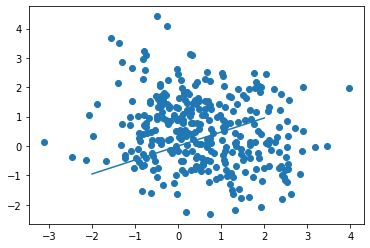

traing accuracy: 0.76875
iteration: 100000
PLA time is  1.5718629360198975

Pocket
Min_w equal to: [ 0.          1.89939287 -2.49311133]


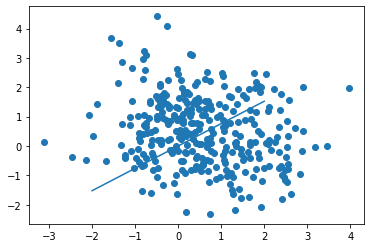

traing accuracy: 0.790625
iteration: 100000
Pocket time is  84.47662734985352

PLA test accuracy: 0.7375

Pocket test accuracy: 0.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

X1 = np.random.multivariate_normal((1,0), [[1,0],[0,1]], (200,), 'ignore')#二维正态分布

X2 = np.random.multivariate_normal((0,1), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

data_PLA_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\ 
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)]))#合并数据
data_PLA_train = np.random.permutation(data_PLA_train)        #对数据集进行随机排序
data_Pocket_train = data_PLA_train

data_PLA_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

data_Pocket_test = data_PLA_test

def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def PLA(max_time=100000):
  start = time.time()
  data = np.array(data_PLA_train)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3);
  count = 0
  error = 0
  while count < max_time: #算法循环开始
    count += 1
    error = 0
    flag = 0
    for i in range(0,len(data)):  
      if(flag == 1):
        break
      now_Y = sign(np.dot(w,X[i]))
      if correct_Y[i] == now_Y:
        continue
      error += 1
      w += X[i] * correct_Y[i]
      flag = 1
    if error == 0:
      break
  print("\nPLA")
  print("W equal to:",w)
  end = time.time()
  
  plot_x = np.linspace(-2,2,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))
  print("iteration:",count)
  print('PLA time is ',end - start)
  return w

def Pocket(max_time=100000):
  start = time.time()
  data = np.array(data_Pocket_train)
  X = data[:,:-1]
  correct_Y = data[:,-1]

  w = np.zeros(3)
  count = 0
  
  min_w = w
  min_error = len(X)

  while count < max_time:   #算法循环开始
    count += 1
    error = 0
    flag = 0
    error_list = []
    for i in range(0,len(data)):
      now_Y = sign(np.dot(w,X[i]))
      if correct_Y[i] == now_Y:
        continue
      else:
        error_list.append([X[i],correct_Y[i]])  #记录error数据
      error += 1

    if error == 0:
      min_error = 0
      break
    else:
      if error < min_error:
        min_error = error
        min_w = w

    error_sample = random.choice(error_list)  #随机取一个error对w更新
    w += error_sample[0] * error_sample[1]
    
  print("\nPocket")
  print("Min_w equal to:",min_w)
  end = time.time()

  plot_x = np.linspace(-2,2,1000)
  plot_y = -(min_w[1]/min_w[2])*plot_x - min_w[0]/min_w[2]
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(min_w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))
  print("iteration:",count)
  print('Pocket time is ',end - start)
  return min_w

def PLA_Test(w):
  data = np.array(data_PLA_test)
  X = data[:,:-1]
  correct_Y = data[:,-1]
  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("\nPLA test accuracy:",(len(X)-error)/len(X))

def Pocket_Test(w):
  data = np.array(data_Pocket_test)
  X = data[:,:-1]
  correct_Y = data[:,-1]
  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,X[i]))
    if correct_Y[i] == now_Y:
      continue
    error += 1
  print("\nPocket test accuracy:",(len(X)-error)/len(X))


PLA_w = PLA()
Pocket_w = Pocket()
PLA_Test(PLA_w)
Pocket_Test(Pocket_w)





四、改变算法中的各类超参数、样本数量、样本分布等，讨论实验结果。

1. 当Pocket迭代次数从100->100000的增加过程中正确率提高，但在1000后趋于稳定
2. 样本分布得越密集结果越差，分布越开结果越好。样本分布越密集，Pocket算法越比PLA算法优秀
3. 样本越多，PLA越有可能无法得到最好结果，得达到迭代次数才会停止